In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [18]:
import os


In [19]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


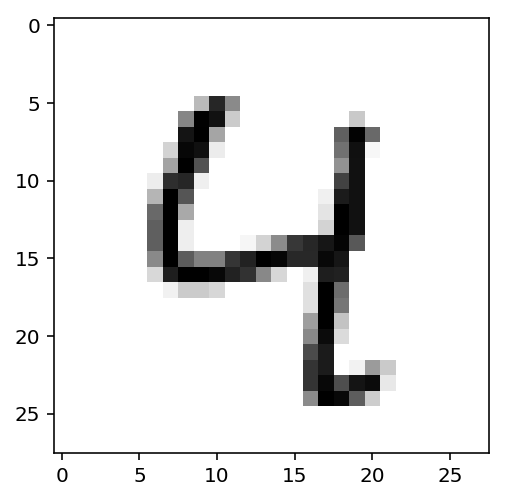

In [21]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

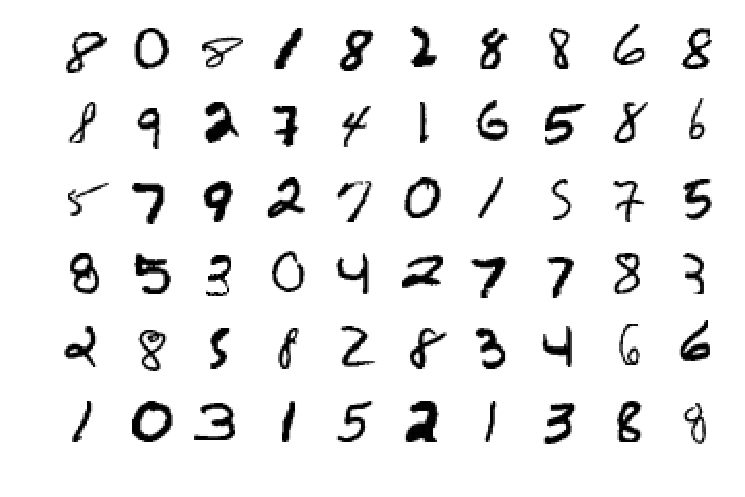

In [22]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [23]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [24]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [25]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0074,  0.0074,  0.0074,  ...,  0.0074,  0.0074,  0.0074],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [26]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [27]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 2.0284e-02,  1.3450e-02,  9.4297e-03,  ..., -2.4463e-03,
         -2.8730e-02,  3.2073e-02],
        [ 2.0174e-02, -3.1534e-02,  1.1838e-02,  ..., -2.3437e-02,
         -3.4253e-02,  3.3566e-02],
        [-1.6410e-05,  1.2141e-02, -1.2843e-02,  ...,  2.4337e-02,
         -1.6970e-02,  3.1541e-02],
        ...,
        [-6.2232e-04,  3.0021e-02, -1.1176e-02,  ...,  2.4615e-03,
         -1.1090e-02, -3.1610e-02],
        [ 1.5129e-02, -2.2314e-02,  1.1287e-02,  ...,  3.0373e-02,
         -1.6156e-02,  2.0568e-02],
        [ 1.4823e-02, -1.1018e-02, -2.9700e-02,  ...,  2.9777e-03,
          2.7607e-02, -3.4677e-02]], requires_grad=True)
Gradient - tensor([[-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
   

In [12]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0301, -0.0347, -0.0188,  ...,  0.0282,  0.0170, -0.0124],
        [-0.0190, -0.0179,  0.0341,  ...,  0.0300,  0.0317,  0.0160],
        [ 0.0344,  0.0137,  0.0182,  ..., -0.0087,  0.0315, -0.0133],
        ...,
        [-0.0065, -0.0197, -0.0060,  ..., -0.0093, -0.0252,  0.0181],
        [ 0.0025,  0.0259, -0.0097,  ..., -0.0208, -0.0033, -0.0268],
        [ 0.0072, -0.0272,  0.0272,  ...,  0.0304, -0.0283,  0.0244]],
       requires_grad=True)


In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6210057292538665
Epoch 1 - Training loss: 0.2800595391867384
Epoch 2 - Training loss: 0.21573407584622598
Epoch 3 - Training loss: 0.1716975591369847
Epoch 4 - Training loss: 0.14260712285031643
Epoch 5 - Training loss: 0.1218628745470474
Epoch 6 - Training loss: 0.1058823175178265
Epoch 7 - Training loss: 0.09393892276273576
Epoch 8 - Training loss: 0.08504598143933488
Epoch 9 - Training loss: 0.0771658663947715
Epoch 10 - Training loss: 0.07025609506137256
Epoch 11 - Training loss: 0.06491933492342951
Epoch 12 - Training loss: 0.060014615273242124
Epoch 13 - Training loss: 0.05520588987574442
Epoch 14 - Training loss: 0.05105722542511605

Training Time (in minutes) = 3.4435011466344196


In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    

Predicted Digit = 3


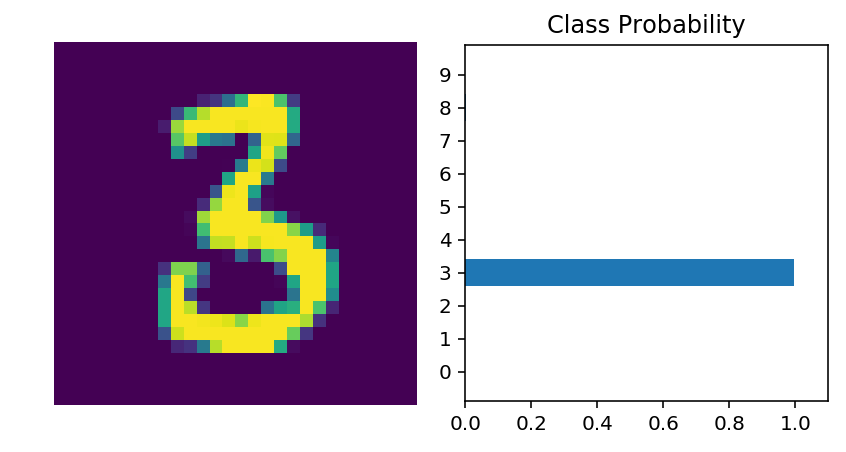

In [15]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [16]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9761
